In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
Gym_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/anomoly_log/data.csv')
Gym_data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
Gym_data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


The dataset seems very clean because

Number of rows for all the data columns are same
Maximum number of people = 138 and min = 0 , looks reasonable
Maximum timestampvalue = 86120 which equal around 23 hours is reasonable
max day of the week = 6 and min = 0 , seems reasonable
apperant temperature and actual temperature ranges are logical
Below we plot pair plot , to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

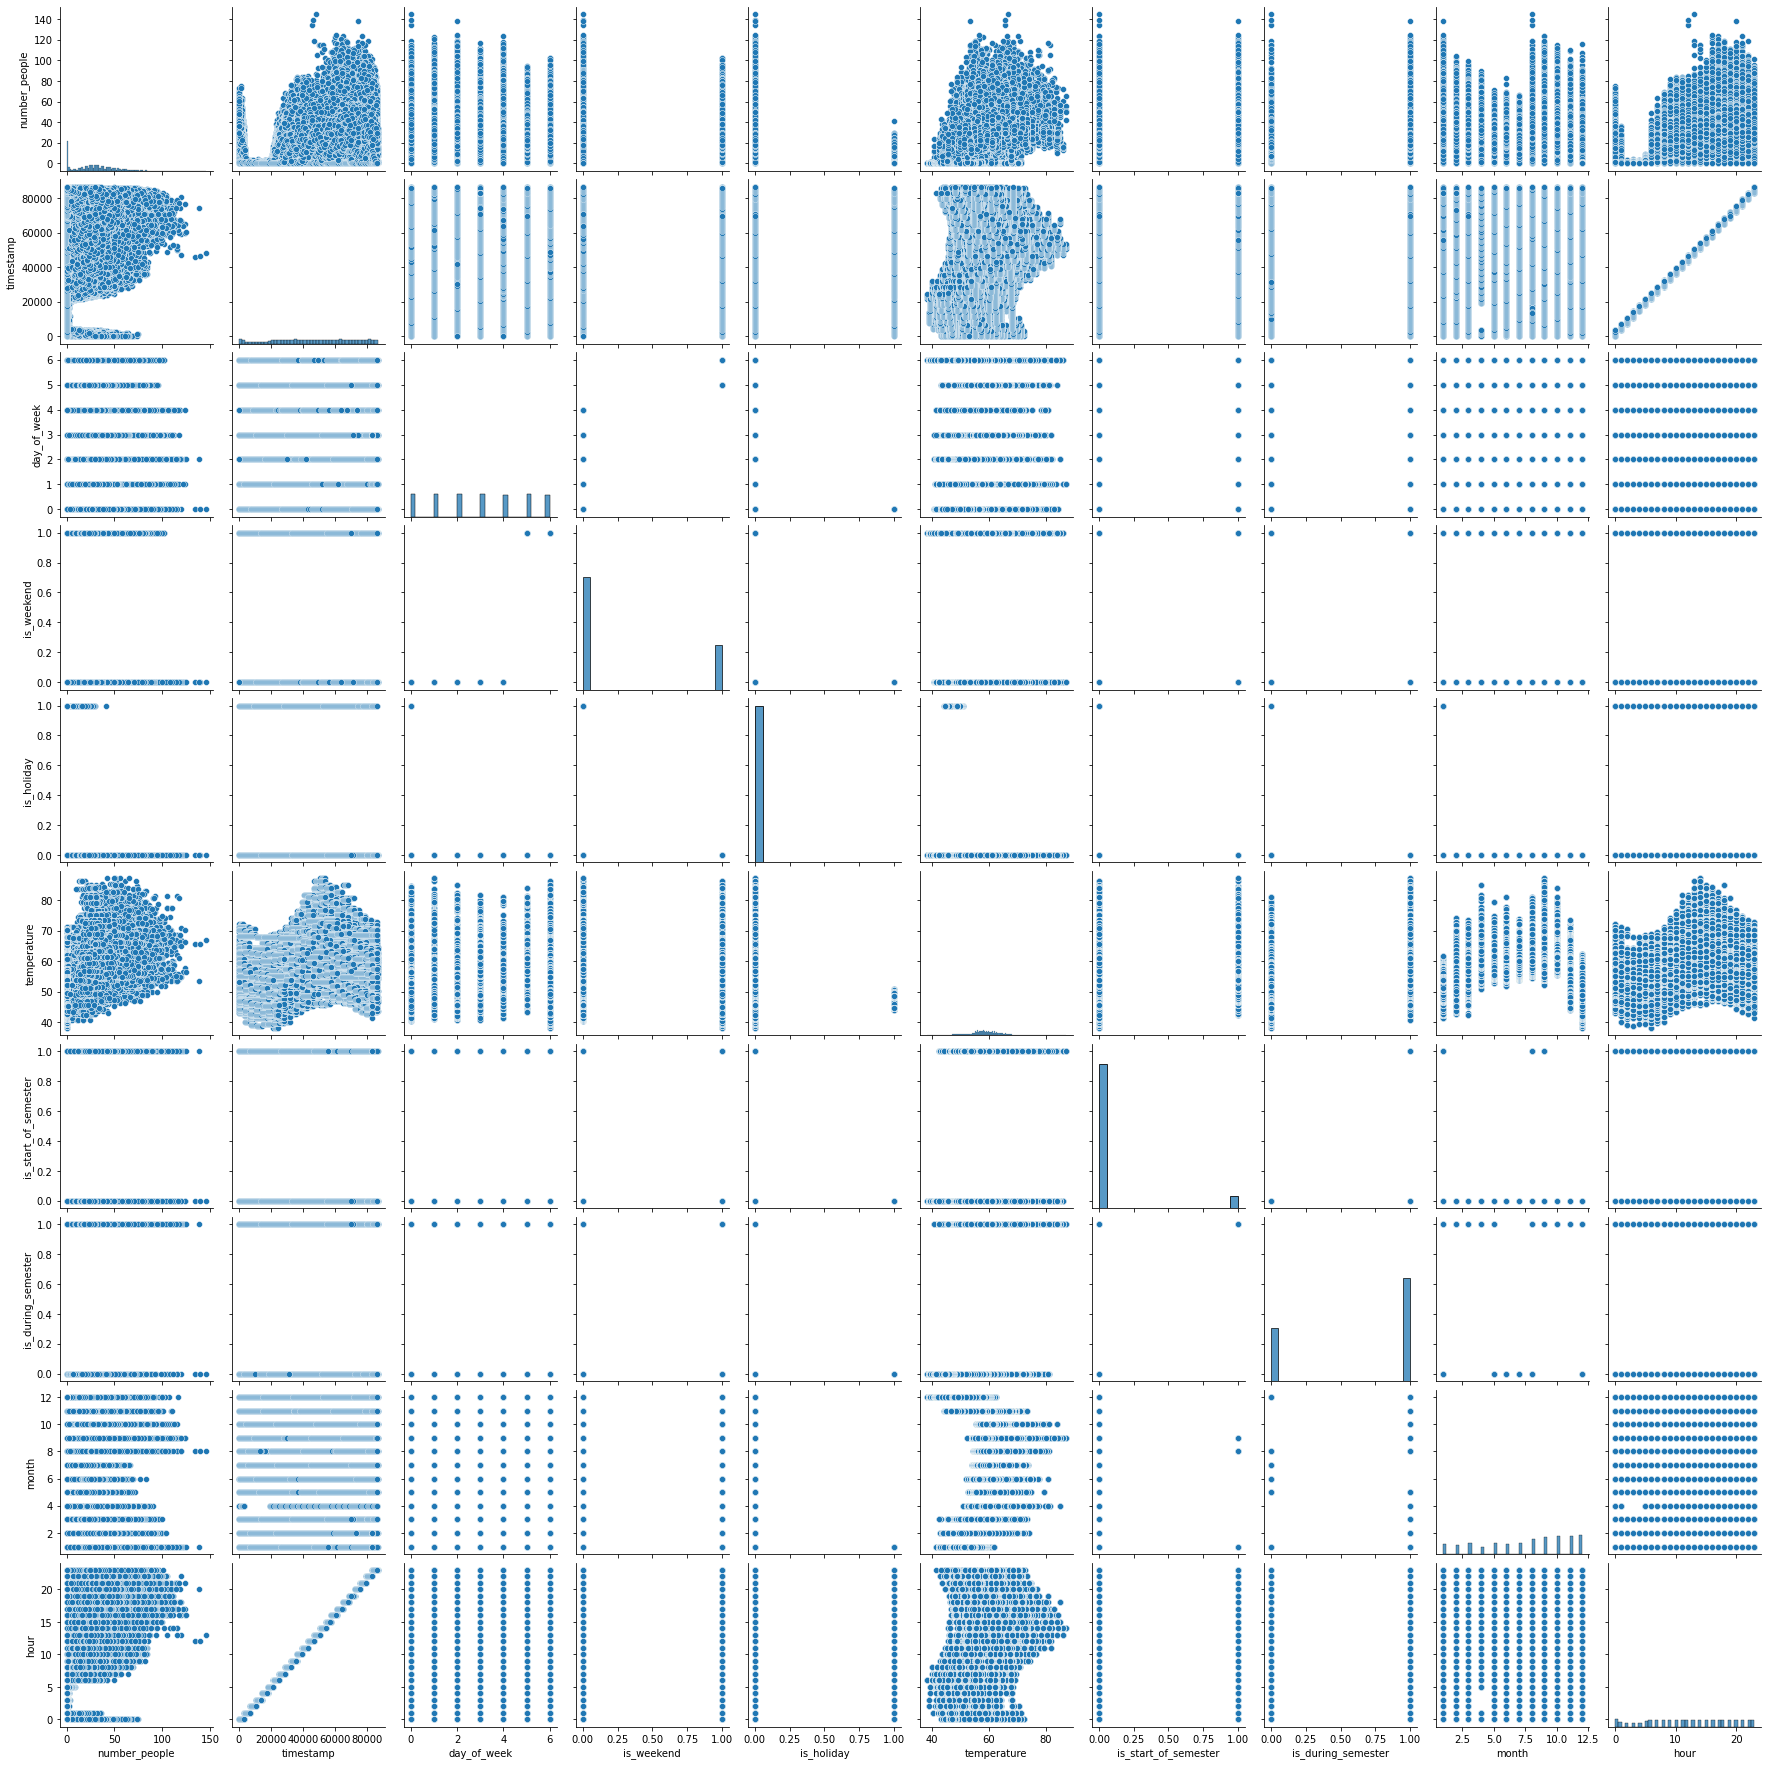

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(Gym_data)

From above pairplot few things can be found

number of people attending gym and temperatures are showing gaussian distribution which is good thing
There is some kind of relationship exiting between temperatures and number of people attending gym
There is strong correleation between apperent temperature and temperature (offcourse !!), so which developing predictive model, one of them has to go out.
Let's get insights into the how data is correlated



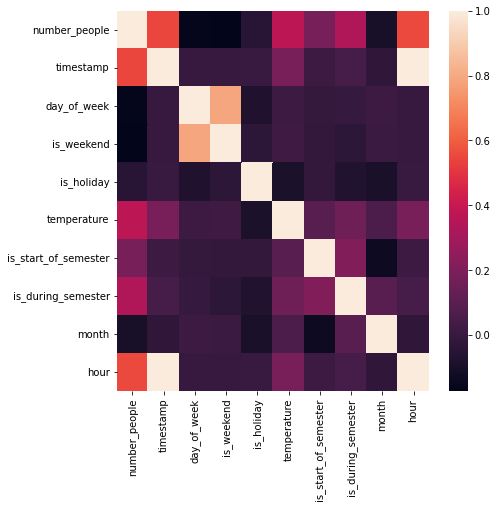

In [ ]:
corrmat = Gym_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()


There is positive correlation between number of people and timestamp. Does it mean more number of people are coming at higher timestamp? Lets find out

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


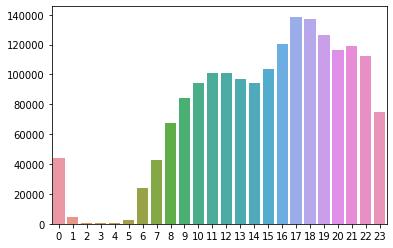

In [ ]:
Bins = []
for i in range(0,24):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['timestamp']/3600 > i and row['timestamp']/3600 < i+1):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
                  
sb.barplot(list(range(24)),Bins)


so statement "more number of people are coming at higher timestamp" is true from above graph

Analysis -
More number of people go to the gym late in the day than early


From pairplot there is negative correlation between day_of_week and number of people going to gym. Does it mean that more number of people go to gym on day = 0 i.e monday than and less on sunday?? Let's find out

[288590, 296140, 291356, 269721, 261196, 202524, 198320]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


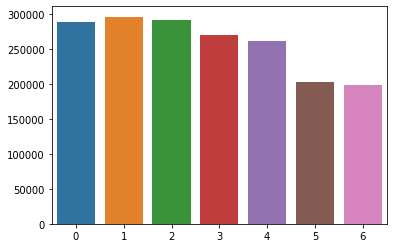

In [ ]:
Bins = []
for i in range(0,7):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['day_of_week'] >= i and row['day_of_week'] < i+1):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
print(Bins)
            
                       
sb.barplot(list(range(7)),Bins)


Early during week more number of people are going to gym and it goes steadily down till sunday.

Analysis -
From Monday till sunday number of people going to gym steadily decreases


From correlation plot, there exists the positive correlation between number of people going to gym and temperature. Lets validate !!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


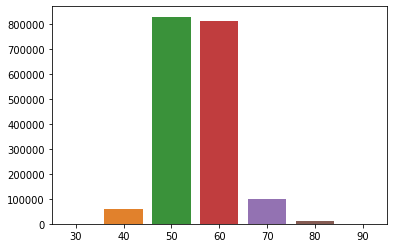

In [ ]:
Bins = []
for i in range(30,100,10):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['temperature'] >= i and row['temperature'] < i+10):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
                  
sb.barplot(list(range(30,100,10)),Bins)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


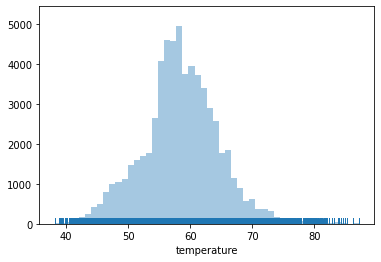

In [ ]:
sb.distplot(Gym_data['temperature'], kde=False, rug=True)

So even though from barplot it seems like more people attend gym in warm weather its not true as most number of days weather remains in range 50 to 70. So the analysis that more people attend gym during 50 to 70 temperature range is not entirely correct.

Pairplot suggest that more people go to gym at start of semester. Checking ...!



In [ ]:
NumberofPeopleDuringSem = 0
NumberofPeoplestartSem = 0
for index, row in Gym_data.iterrows():
    if(row['is_start_of_semester'] == 0):
        NumberofPeopleDuringSem = NumberofPeopleDuringSem + row['number_people']
    else:
        NumberofPeoplestartSem = NumberofPeoplestartSem + row['number_people']
print('Number of people at start of sem = ' + str(NumberofPeoplestartSem))
print('Number of people during sem = ' + str(NumberofPeopleDuringSem))


Number of people at start of sem = 211969
Number of people during sem = 1595878


True that!! people go to gym more at start of sem. And once exams start getting close..its study time .. :)



Analysis -
At start of semester people tend to go to gym more


Model predicting number of students attending the gym


In [ ]:
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [ ]:
Gym_data_copy = Gym_data
y = Gym_data_copy['number_people'].values
Gym_data_copy = Gym_data_copy.drop(['date','number_people','temperature','is_weekend'],axis=1)
X = Gym_data_copy.values
Gym_data_copy.head()

,timestamp,day_of_week,is_holiday,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,0,8,17
1,62414,4,0,0,0,8,17
2,63015,4,0,0,0,8,17
3,63616,4,0,0,0,8,17
4,64217,4,0,0,0,8,17


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [ ]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
sdg = SGDRegressor()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print(sdg.score(Xtest, ytest))

0.44885961492782644


In [ ]:
radm = RandomForestRegressor()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict(Xtest)
print(radm.score(Xtest, ytest))

0.7271173031684528


Analysis -
The predictive model can predict number of people attending the gym with 81% accuracy


In [ ]:
import numpy as np
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(Gym_data_copy.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], Gym_data_copy.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))


Feature ranking:
1. feature 0 timestamp (0.702412)
2. feature 4 is_during_semester (0.109006)
3. feature 1 day_of_week (0.091341)
4. feature 5 month (0.072814)
5. feature 3 is_start_of_semester (0.013306)
6. feature 6 hour (0.009861)
7. feature 2 is_holiday (0.001260)


Analysis -
Below is the list of the factors affecting the number of people attending gym ranked from top to bottom in decreasing imprtance manner
Timestamp

Temperature

Day of week

Is start of semester

Is holiday 